# Исследование объявлений о продаже квартир

Задача исследования состоит в определении рыночной стоимости недвижимости и установлении соответствующих параметров. Это поможет построить автоматизированную систему, которая сможет отслеживать аномалии и мошенническую деятельность в этой сфере.

Каждое объявление о продаже квартиры содержит два вида данных. Первый вид данных вводятся пользователями, а второй автоматически вычисляется на основе картографических данных, таких как расстояние до центра города, аэропорта, ближайшего парка и водоема.

Задача исследователя заключается в поиске параметров, которые помогут определить рыночную стоимость недвижимости. В качестве основных параметров можно выделить: общую площадь квартиры, жилую площадь и площадь кухни, этаж, удаленность от аэропорта и наличие парков вблизи. Эти параметры могут использоваться для создания автоматизированной системы, которая будет отслеживать аномалии и мошенническую деятельность в сфере недвижимости. 

### Изучение информации

In [1]:
import pandas as pd
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/Users/arina200212yandex.ru/Desktop/real_estate_data.csv',sep='\t')

In [2]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Анализируя предоставленные данные, можно заметить, что некоторые столбцы имеют неправильный тип данных. Ниже приведены рекомендации по исправлению типов данных:

- Столбец "first_day_exposition" имеет тип "object" и должен быть изменен на тип "datetime", так как в столбце находятся даты.
- Столбец "floors_total" имеет тип "float64" и должен быть изменен на тип "int64", так как число этажей является целым значением.
- Столбец "is_apartment" должен быть изменен на тип "bool", так как ответ на вопрос "Это апартаменты?" может быть только "True" или "False".
- Столбец "balcony" должен быть изменен на тип "int64", так как число балконов является целым значением.
- Столбец "parks_around3000" должен быть изменен на тип "int64", так как число парков является целым значением.
- Столбец "ponds_around3000" должен быть изменен на тип "int64", так как число водоемов является целым значением.
- Столбец "days_exposition" должен быть изменен на тип "int64", так как количество дней является целым значением.


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

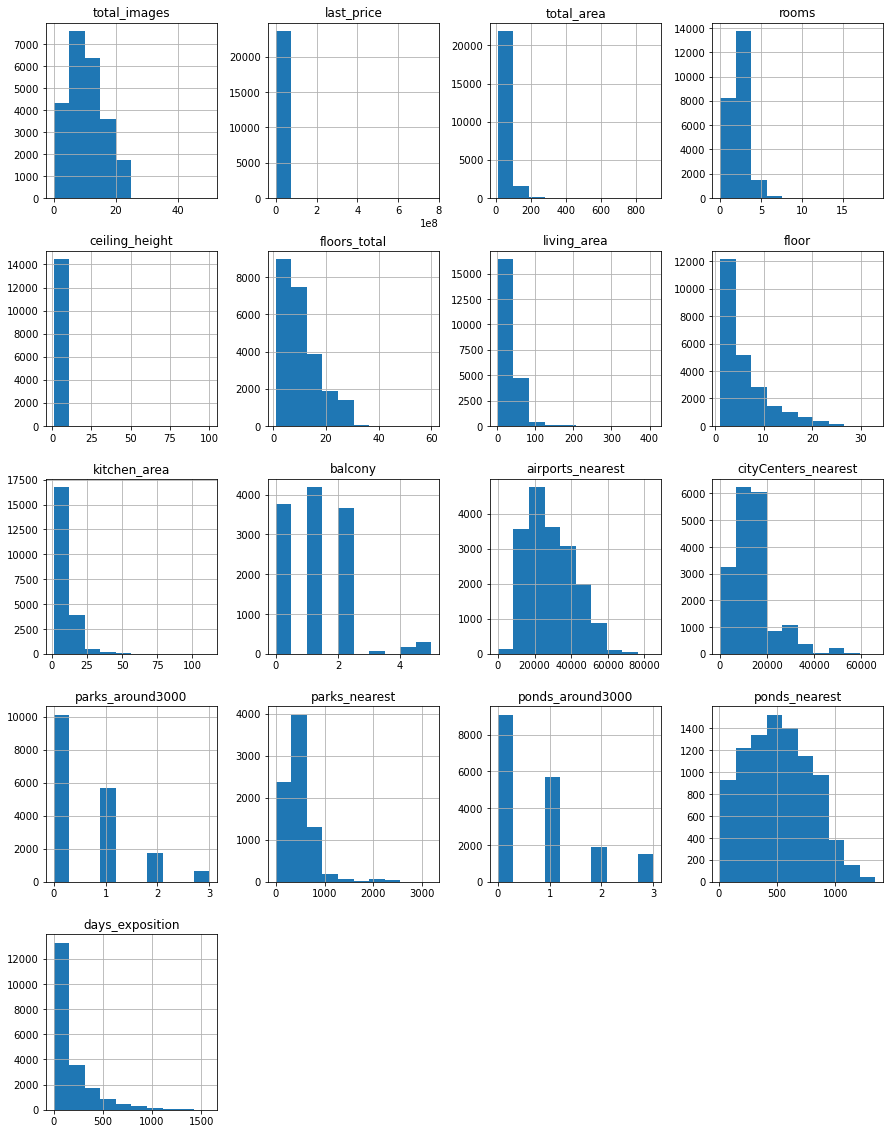

In [4]:
data.hist(figsize=(15, 20))

Вывод:
Анализируя предоставленные данные, было обнаружено несколько проблем в данных. Во-первых, некоторые столбцы имеют неправильный тип данных, что делает их использование для дальнейшего анализа затруднительным. Во-вторых, были обнаружены пропущенные значения в некоторых столбцах, что может повлиять на результаты анализа. В-третьих, в столбце "locality_name" есть неявные дубликаты, что может привести к искажениям в анализе. Наконец, в данных могут быть наблюдаться аномальные значения, которые могут потребовать дополнительной обработки.

Для того чтобы подготовить данные к анализу, необходимо выполнить следующие шаги:

1. Исправить неправильные типы данных в столбцах, где это необходимо.
2. Обработать пропущенные значения, заполнив их, если это возможно, или удалив строки с пропущенными значениями.
3. Сбросить неявные дубликаты в столбце "locality_name" для избежания искажений результатов анализа.
4. Обработать аномальные значения, если таковые имеются.

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

После применения специального метода обработки данных было обнаружено, что в нескольких столбцах содержатся пропущенные значения. Эти столбцы включают:

- "ceiling_height" (высота потолков)
- "floors_total" (общее число этажей в доме)
- "living_area" (жилая площадь в квадратных метрах)
- "is_apartment" (апартаменты)
- "kitchen_area" (площадь кухни в квадратных метрах)
- "balcony" (число балконов)
- "locality_name" (название населенного пункта)
- "airports_nearest" (расстояние до ближайшего аэропорта в метрах)
- "cityCenters_nearest" (расстояние до центра города)
- "parks_around3000" (число парков в радиусе 3 км)
- "parks_nearest" (расстояние до ближайшего парка)
- "ponds_around3000" (число водоемов в радиусе 3 км)
- "ponds_nearest" (расстояние до ближайшего водоема)
- "days_exposition" (число дней, в течение которых было размещено объявление)

Для каждого из этих столбцов будет применен следующий алгоритм обработки:

1. Изучение нулевых значений столбца для определения способа их возникновения.
2. Определение возможности замены пропущенных значений на основе характера их возникновения.
3. При возможности замены – замена пропущенных значений в столбце.



In [6]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Проанализировав пропущенные значения данного столбца, не было обнаружено зависимости с другими данными. Вероятной причиной появления пропусков может являться ошибочное заполнение формы при вводе данных.

В данном случае не рекомендуется заменять пропущенные значения на другие, так как их количество слишком большое - это может повлиять на результаты исследовательского анализа и вызвать появление выбросов в данных. Вместо этого, возможными решениями являются исключение строк с пропущенными значениями из набора данных для определенных типов анализа, или оставление пропущенных значений как есть при использовании других методов анализа данных.

In [8]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


В столбце присутствует 86 пропущенных значений, которые не связаны с другими данными. Предположительной причиной появления пропусков может быть ошибочное заполнение формы при вводе данных. В данном случае, возможными способами решения являются: исключение строк с пропущенными значениями из набора данных для некоторых типов анализа или оставление пропущенных значений без замены. 

Также, на начальном этапе исследования была обнаружена ошибка в типе данных этого столбца, поэтому необходимо провести изменение типа данных с текущего на int. Если количество строк с пропущенными значениями незначительно по сравнению с объемом данных, оставление этих строк без взаимодействия с ними также может быть решением.

In [9]:
data=data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total']=data['floors_total'].astype(int)

In [10]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23557,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23577,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23584,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23593,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


В данном столбце содержится 1903 пропущенных значений, которые не взаимосвязаны с другими данными. Предположительной причиной появления пропусков может являться ошибка при заполнении данных в форме ввода. 

Одним из возможных решений при обнаружении пропущенных значений является их не замена, чтобы избежать возможных искажений в данных и не передемонстрировать однотипные значения при исследовании. 

In [12]:
data[data['is_apartment'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23608,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23609,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23610,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23611,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


В данном столбце отмечены пропуски,не взаимосвязаны с другими данными. Предположительной причиной появления пропусков может являться обновление формы с добавлением нового поля "апартаменты". В связи с этим строки таблицы, заполненные ранее, могли быть созданы без указания значения в этом поле.

По результатам анализа возможно решение пропусков заменой на логическое значение False, так как это значение наиболее подходит для данного типа данных. Необходимо также изменить тип данных этого столбца на bool. Это обеспечит возможность дальнейшей работы с данными без проблем с типами данных и поможет корректно отобразить значения в этом поле при последующих исследованиях.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)

In [14]:
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9,NaN,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5,NaN,1,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13,NaN,13,False,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23570,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18,19.6,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23577,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10,NaN,1,False,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23584,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9,NaN,2,False,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23593,0,2500000.0,35.0,2017-12-08T00:00:00,1,NaN,9,NaN,4,False,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


В столбце kitchen_area не было выявлено взаимосвязанных пропусков. В данном случае, если пропущенные значения не являются критичными для исследовательских целей, наиболее разумным решением может быть сохранение этих строк без замены пропущенных значений. Это избежит создания большого количества однотипных значений и не повлияет на результаты анализа данных, если эти строки не используются в определенных типах анализа. 

In [16]:
data[data['balcony'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12,20.30,3,False,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23606,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5,17.50,4,False,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23608,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.30,3,False,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23609,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.00,4,False,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23610,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.70,1,False,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Столбец balcony содержит пропуски, которые не демонстрируют взаимосвязь с другими данными. Предположительной причиной появления пропусков может быть ошибка при заполнении формы ввода. При этом, можно сделать предположение, что если значение не было указано, то в данной квартире нет балкона. С учетом вышеизложенного, наиболее подходящим решением может быть замена пропущенных значений на 0, предполагая, что это означает отсутствие балкона в квартире. Также, для корректной работы с данными, необходимо изменить тип данных столбца на int

In [17]:
data['balcony'] = data['balcony'].fillna(0).astype(int)

In [18]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1093,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5,50.80,2,False,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2027,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4,42.60,2,False,...,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2596,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24,15.60,3,False,...,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2625,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24,33.10,21,False,...,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3563,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5,30.80,5,False,...,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4137,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8,39.62,7,False,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4175,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4,52.30,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4655,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7,NaN,6,False,...,NaN,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5324,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7,59.10,5,False,...,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5688,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24,20.00,23,False,...,NaN,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Взаимосвязи между пропусками и другими значениями не выявлено. Данных пропусков очень мало, так что строки с ними можно удалить

In [19]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [20]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5,45.50,3,False,...,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23558,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23561,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23562,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.70,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


По таблице можно заметить, что значения в столбце airports_nearest имеют взаимосвязь с cityCenters_nearest, parks_nearest, ponds_nearest. Однако, в данном столбце имеются пропущенные значения, которые не могут быть заменены.

С учетом того, что данные столбцы не являются основной фокусной точкой исследования, наиболее разумным решением является оставление пропущенных значений без замены. Это избежит нежелательных искажений в данных и не повлияет на результаты анализа

In [21]:
data[data['ponds_around3000'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5,45.50,3,False,...,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23558,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23561,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23562,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.70,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Также, на основе данных таблицы можно заметить зависимость между столбцами parks_around3000 и parks_nearest. При этом столбец parks_around3000 указывает количество парков в радиусе 3 км от объекта недвижимости.

Исходя из этого, возможно заменить пропущенные значения в столбце parks_nearest на 0, что означает отсутствие парка в радиусе 3 км от объекта недвижимости. Также  измененить тип данных этого столбца на int для удобства дальнейшей работы с данными.

In [22]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

In [23]:
data[data['parks_around3000'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,0,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,0,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,0,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,0,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5,45.50,3,False,...,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,0,NaN,NaN
23558,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,0,NaN,413.0
23561,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,0,NaN,45.0
23562,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.70,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,0,NaN,NaN


Анализируя таблицу, можно заметить зависимость между столбцами ponds_around3000 и ponds_nearest. При этом столбец ponds_around3000 указывает количество водоемов в радиусе 3 км от объекта недвижимости.

Исходя из этого, возможно заменить пропущенные значения в столбце ponds_nearest на 0, что означает отсутствие водоема в радиусе 3 км от объекта недвижимости. Также измененить тип данных этого столбца на  int для удобства дальнейшей работы с данными.

In [24]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)

In [25]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22,NaN,3,False,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9,30.3,7,False,...,7.00,0,Санкт-Петербург,30011.0,12872.0,0,NaN,0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24,29.7,9,False,...,8.30,2,Санкт-Петербург,15114.0,12702.0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23550,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26,71.4,17,False,...,15.60,0,Санкт-Петербург,11827.0,11459.0,0,NaN,0,NaN,NaN
23551,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5,17.3,5,False,...,5.60,1,Ломоносов,48393.0,51818.0,0,NaN,0,NaN,NaN
23560,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23562,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN


Зависимости пропущенных значений от других значений не выявлено. Причиной появления пропусков, скорее всего, является техническая ошибка, но точной информации об этом нет. В данном случае заменять пропущенные значения на нули нецелесообразно, так как это может исказить результаты дальнейшего анализа данных. 

В столбце first_day_exposition отсутствуют пропущенные значения, но неправильно указан тип данных. Необходимо изменить тип данных на datetime.

In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Проверим себя и посмотрим все ли значения и типы данных мы изменили:

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [29]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Типы данных изменены все, но пропущенные значение по прежнему остались в тех столбцах, в которых в ходе анализа не является возможным подобрать замену.

Рассмотрим аномальные значения в каждом столбце. Есть ли таковые.

In [30]:
data.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


In [31]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В столбце ceiling_height присутствуют аномальные значения: 25, 32, 27, 24, 26, 14, 20, 27, 1, 100, 1.2. Вероятно, такие значения вызваны технической ошибкой. Есть предположение, что данные могут быть разделены точкой вместо запятой (например, вместо 25 метров - 25.5 метров). Однако, присутствуют значения, которые превышают предполагаемую верхнюю границу высоты потолков, такие как 27.5 метров, а также значения, которые очевидно не связаны с высотой потолков в квартире, такие как 1 метр. Поэтому наиболее правильным решением будет удалить строки с подобными аномальными значениями.

In [32]:
data = data[(data['ceiling_height'] < 14) & (data['ceiling_height'] != 1) & (data['ceiling_height'] != 1.2)]

In [33]:
data['ceiling_height'].unique()

array([ 2.7 ,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        8.3 ,  2.98,

Произвели удаление аномальных значений из столбца ceiling_height. В оставшихся столбцах аномальных значений не выявлено.

Теперь стоит посмотреть наличие дубликатов

In [34]:
data.duplicated().sum()

0

Явных дубликатов не найдено.

Рассмотрим неявные дубликаты в столбце locality_name. Для начала, следует привести все значения столбца к единому формату - нижнему регистру. Затем можно использовать метод replace, чтобы избавиться от приставок и суффиксов и на выходе получить только имена собственные. 

In [35]:
data['locality_name'] = data['locality_name'].str.lower()

In [36]:
data['locality_name'] = data['locality_name'].replace('посёлок|деревня|село|городского типа|коттеджный|поселок','', regex=True)

In [37]:
data['locality_name'].unique()

array(['санкт-петербург', 'петергоф', ' парголово', ' кудрово', 'пушкин',
       '  красный бор', ' мурино', 'сертолово', 'гатчина', 'ломоносов',
       ' фёдоровское', 'выборг', 'кронштадт', 'колпино', 'кировск',
       ' новое девяткино', '  сиверский',
       'садовое товарищество новая ропша', 'павловск', 'всеволожск',
       'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       '  кузьмоловский', ' куттузи', ' торковичи', ' шушары',
       ' первомайское', 'красное ', ' понтонный', ' старая', ' лесколово',
       ' новый свет', ' путилово', 'ивангород', 'сланцы', 'шлиссельбург',
       'никольское', 'зеленогорск', 'сосновый бор', ' оржицы',
       ' кальтино', 'кудрово', '  рощино', 'сясьстрой', 'кириши', 'луга',
       'волосово', ' оредеж', ' бугры', ' металлострой', ' молодёжное',
       'тихвин', ' победа', ' нурма', '  синявино', 'тосно', ' романовка',
       ' александровская', ' лопухинка', '  советский', ' петровское',
       '  токсово', ' келози', ' вартемяги', 'подпо

Предобработка данных завершена. Были исправлены пропущенные значения в тех столбцах, где это было возможно, удалены неявные дубликаты, обычные дубликаты не были найдены. Также были исправлены типы данных. 

Однако, в некоторых столбцах (airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest) остались пропущенные значения

### Добавим в таблицу новые столбцы

Цена одного квадратного метра

In [38]:
data['money_one_m'] = data['last_price'] / data['total_area']

День недели публикации объявления 

In [39]:
data['deni_nedely'] = data['first_day_exposition'].dt.weekday

Месяц публикации объявления

In [40]:
data['month_piblicated'] = data['first_day_exposition'].dt.month

Год публикации объявления

In [41]:
data['year_piblicated'] = data['first_day_exposition'].dt.year

Тип этажа квартиры

In [42]:
def type_floor(row):
    if row['floor'] == 1:
        return 'квартира на первом этаже'
    elif row['floor'] == row['floors_total']:
        return 'квартира на последнем этаже'
    return 'квартира на другом этаж'

In [43]:
data['type_floor'] = data.apply(type_floor, axis=1)

Расстояние до центра города в километрах

In [44]:
def distance(row):
    if row['cityCenters_nearest'] == 'Nan':
        return 'Nan'
    else:
        return row['cityCenters_nearest']/1000

In [45]:
data['cityCenters_nearest_km'] = data.apply(distance, axis=1)

In [46]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,money_one_m,deni_nedely,month_piblicated,year_piblicated,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,квартира на другом этаж,16.028
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,квартира на другом этаж,8.098
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0,NaN,289.0,88524.590164,6,2,2017,квартира на другом этаж,15.008
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.3,3,False,...,310.0,2,553.0,137.0,127525.252525,3,11,2017,квартира на другом этаж,13.878
13,20,3550000.0,42.80,2017-07-01,2,2.56,5,27.0,5,False,...,294.0,3,298.0,366.0,82943.925234,5,7,2017,квартира на последнем этаже,33.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23557,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,NaN,1,806.0,519.0,129903.978052,3,10,2016,квартира на другом этаж,4.489
23559,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,352.0,1,675.0,239.0,73717.948718,4,8,2016,квартира на другом этаж,34.104
23560,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3,381.0,NaN,72490.845228,1,3,2017,квартира на другом этаж,4.232
23563,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,173.0,3,196.0,602.0,149511.400651,1,3,2017,квартира на другом этаж,10.364


Вывод: 

Были добавлены следующие столбцы в исходные данные:

1. money_one_m — стоимость 1 квадратного метра,
2. deni_nedely — день недели публикации (0 - понедельник, 1 - вторник и т.д),
3. month_published — месяц публикации,
4. year_published — год публикации,
5. type_floor — тип этажа (первый, последний или другой этаж),
6. cityCenters_nearest_km — переведенные метры в километры (расстояние до центра).

### Проведите исследовательский анализ данных

In [47]:
import matplotlib.pyplot as plt

Изучим слудеющие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

Общая площадь. Общая площадь в выборке в основном находится в промежутке до 100 м.

count    14455.000000
mean        61.892073
std         37.021663
min         12.000000
25%         41.000000
50%         53.300000
75%         71.300000
max        900.000000
Name: total_area, dtype: float64

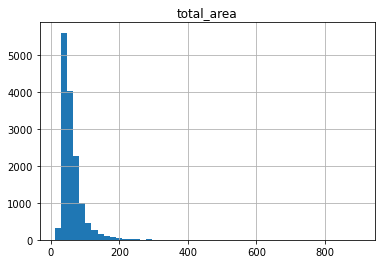

In [48]:
data.hist('total_area', bins= 50)
data['total_area'].describe()

Большинство квартир в нашем датасете имеют жилую площадь, не превышающую 50 квадратных метров.

count    13661.000000
mean        35.681165
std         22.874225
min          2.000000
25%         19.200000
50%         30.800000
75%         43.300000
max        409.700000
Name: living_area, dtype: float64

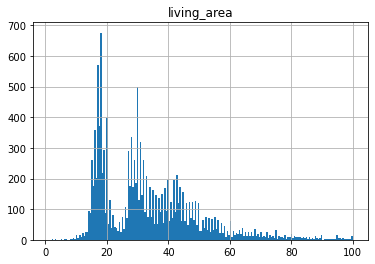

In [49]:
data.hist('living_area', bins= 200, range = (1,100))
data['living_area'].describe()

Площадь кухни в большинстве квартир не превышает 20 квадратных метров.

count    13524.000000
mean        10.567332
std          6.053197
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

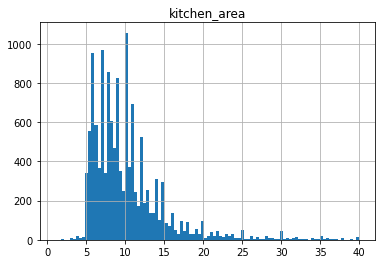

In [50]:
data.hist('kitchen_area', bins= 100, range = (1,40))
data['kitchen_area'].describe()

Стоимость объектов недвижимости, представленных в нашем датасете, в основном составляет около 6,5 миллионов рублей. Для более детального анализа был вызван соответствующий метод, который показал необходимую информацию.

count    1.445500e+04
mean     6.836207e+06
std      1.019537e+07
min      1.219000e+04
25%      3.570000e+06
50%      4.850000e+06
75%      7.000000e+06
max      4.200000e+08
Name: last_price, dtype: float64

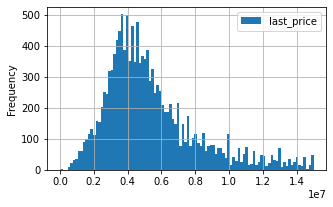

In [51]:
data.plot(y = 'last_price', kind = 'hist', bins = 100,range = (0,15000000), grid=True, figsize = (5,3))
data['last_price'].describe()

Количество комнат, представленных в квартирах, в основном колеблется в диапазоне от 1 до 3.

count    14455.000000
mean         2.137184
std          1.099107
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

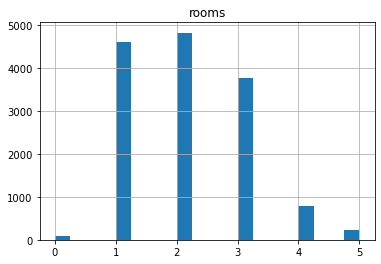

In [52]:
data.hist('rooms', bins= 20, range = (0,5))
data['rooms'].describe()

Высота потолков в квартирах находится в диапазоне от 2 до 4 метров.

count    14455.000000
mean         2.728443
std          0.299182
min          1.750000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

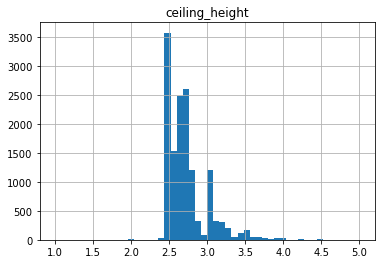

In [53]:
data.hist('ceiling_height', bins= 50, range =(1,5))
data['ceiling_height'].describe()

В большинстве случаев квартиры расположены на первых пяти этажах домов.

count    14455.000000
mean         5.623106
std          4.612497
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: floor, dtype: float64

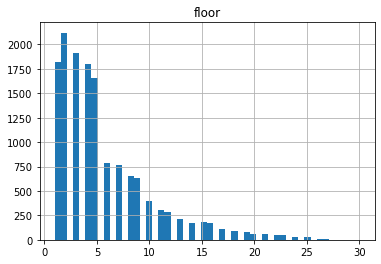

In [54]:
data.hist('floor', bins= 50)
data['floor'].describe()

В большинстве случаев квартиры расположены на последних и других этажах, причем квартиры на последних этажах имеют более высокую цену. Самое малое количество квартир находится на первом этаже.

In [55]:
type_floor_hist = data.groupby('type_floor').sum()
type_floor_hist

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,money_one_m,deni_nedely,month_piblicated,year_piblicated,cityCenters_nearest_km
type_floor,,,,,,,,,,,,,,,,,,,,,
квартира на другом этаж,110175,7.401623e+10,651834.12,22121,28770.73,120168,351324.061517,64878,26,64,...,5242,1859199.0,6536,2213975.0,1619754.0,1.114626e+09,26415,66869,21294914,119896.257
квартира на первом этаже,17391,9.203077e+09,104053.69,3987,4910.78,12348,58597.540000,1817,5,8,...,929,301177.0,1040,346969.0,317715.0,1.542630e+08,4503,11367,3665759,20684.591
квартира на последнем этаже,21712,1.559807e+10,138762.11,4785,5758.14,14587,77518.800002,14587,10,5,...,1190,355425.0,1341,399794.0,348517.0,1.996017e+08,5249,13208,4202423,21607.143


array([[<AxesSubplot:title={'center':'total_images'}>]], dtype=object)

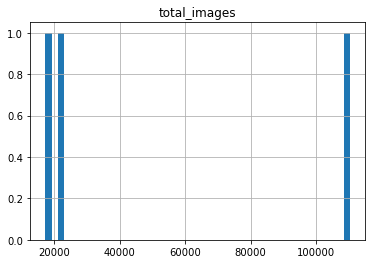

In [56]:
type_floor_hist.hist('total_images',bins = 50)

Общее количество этажей в здании в большинстве случаев не превышает 10, а больше всего квартир представлено в пятиэтажках.

count    14455.000000
mean        10.176617
std          6.196854
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

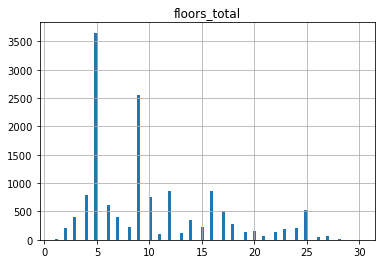

In [57]:
data.hist('floors_total', bins= 100, range = (1,30))
data['floors_total'].describe()

Расстояние до центра города в большинстве случаев составляет от 10 000 до 20 000 метров.

count    11524.000000
mean     14073.931881
std       8757.696220
min        181.000000
25%       9058.000000
50%      12966.000000
75%      16036.750000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

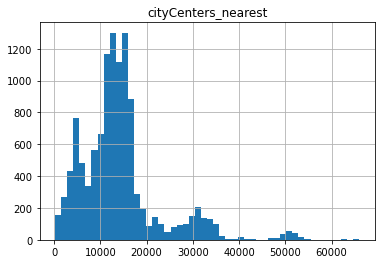

In [58]:
data.hist('cityCenters_nearest', bins= 50)
data['cityCenters_nearest'].describe()

Расстояние до ближайшего аэропорта в большинстве случаев находится в диапазоне от 20 000 до 40 000 метров.

count    11504.000000
mean     28827.551721
std      12623.985221
min          0.000000
25%      18551.000000
50%      26757.500000
75%      37091.000000
max      84869.000000
Name: airports_nearest, dtype: float64

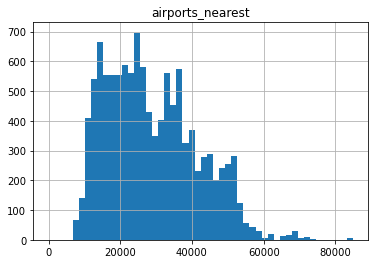

In [59]:
data.hist('airports_nearest', bins= 50)
data['airports_nearest'].describe()

Расстояние до ближайшего парка в большинстве случаев не превышает 500 метров.

count    5277.000000
mean      476.748342
std       320.200190
min         3.000000
25%       285.000000
50%       449.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

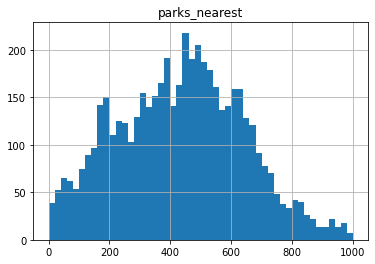

In [60]:
data.hist('parks_nearest', bins= 50, range=(0,1000))
data['parks_nearest'].describe()

Большинство объявлений было опубликовано в феврале месяце в четверг. Для более наглядного отображения этой информации был выбран другой тип графика.

<AxesSubplot:xlabel='deni_nedely', ylabel='month_piblicated'>

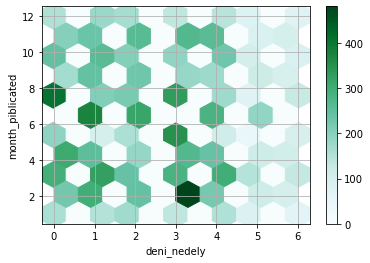

In [61]:
data.plot(x='deni_nedely', y='month_piblicated',kind='hexbin', gridsize=10
    , sharex=False, grid=True)

Вывод о предлагаемых квартирах:

Предлагаемые квартиры в основном имеют площадь до 100 квадратных метров, при этом жилая площадь располагается в интервале от 20 до 40 квадратных метров. Площадь кухни варьируется от 5 до 10 квадратных метров. Стоимость квартир в рассматриваемой выборке колеблется в диапазоне от 1.2 до 7 миллионов. Количество комнат в большей части квартир от 1 до 3. Высота потолков в большей части квартир составляет от 2.5 до 3 метров. Квартиры в основном расположены с первого по пятый этаж, при этом квартиры на последнем этаже имеют более высокую цену. Общее количество этажей в доме в большинстве случаев не превышает 10, а больше всего квартир представлено в пятиэтажках. Расстояние до центра города в основном составляет от 10 000 до 20 000 метров, а расстояние до ближайшего парка не превышает 500 метров. Больше всего объявлений было опубликовано в феврале и летом, при этом четверг стал самым популярным днем для размещения объявлений.

Изучим несколько гипотез:

1) Как быстро продавались квартиры

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

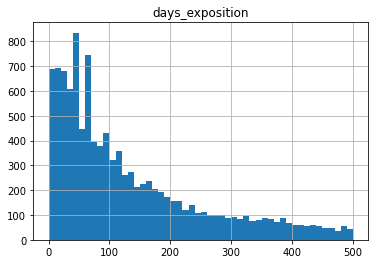

In [62]:
data.hist('days_exposition', bins= 50, range = (0,500))

В большей части квартиры продавались до 100 дней. Самое большие количество квартир продавлось от 0 до 50 дней.

In [63]:
prodaji = data['days_exposition'].describe()
prodaji

count    12011.000000
mean       190.324369
std        228.602560
min          1.000000
25%         45.000000
50%        103.000000
75%        247.000000
max       1580.000000
Name: days_exposition, dtype: float64

Быстрыми продажими можно считать занчения до 1 квантиля - 45 дней, а вот необычайно долгим значения после третьей квантили от 232 дней.

2) Какие факторы больше всего влияют на общую (полную) стоимость объекта

Изначально сравним влияние общей площади на стоимость обьекта

Для наглядности стоимости разобьем цены на категории:

In [64]:
def total_price(income):
    try:
        if 0 <= income <= 1500000.0:
            return 'E'
        elif 1500001.0 <= income <= 4000000.0:
            return 'D'
        elif 4000000.0 <= income <= 6000000.0:
            return 'C'
        elif 6000000.0 <= income <= 763000000.0:
            return 'B'
        elif income >= 763000001.0:
            return 'A'
    except:
        pass

In [65]:
data['total_price'] = data['last_price'].apply(total_price)

In [101]:
table_total = data.pivot_table(index= 'total_price',values= 'total_area',aggfunc = ['mean', 'count','median'])
table_total

,mean,count,median
,total_area,total_area,total_area
total_price,,,
B,91.498408,4825,79.00
C,52.900918,4595,51.00
D,41.815740,4700,39.73
E,40.466866,335,38.50


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

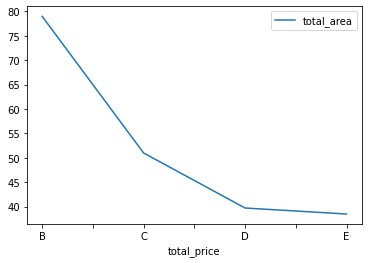

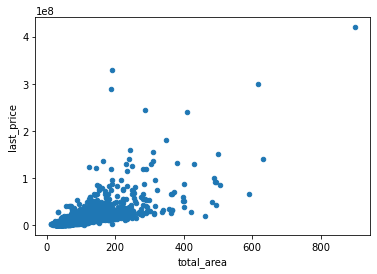

In [102]:
table_total.plot(y='median')
data.plot(x='total_area', y='last_price', kind='scatter')

Больше всего квартир в категории D, где сумма сделки составляет от 1,5 до 4 миллионов, а средняя площадь 41 кв.м. Зависимость между этими параметрами найдена.

Площади кухни и стоимости обьекта.

In [103]:
table_kyxny = data.pivot_table(index= 'total_price',values= 'kitchen_area',aggfunc = ['mean', 'count','median'])
print(table_kyxny.corr())
print(table_kyxny)

                            mean        count       median
                    kitchen_area kitchen_area kitchen_area
mean   kitchen_area     1.000000     0.580077     0.984821
count  kitchen_area     0.580077     1.000000     0.702564
median kitchen_area     0.984821     0.702564     1.000000
                    mean        count       median
            kitchen_area kitchen_area kitchen_area
total_price                                       
B              14.541355         4545         12.1
C               9.260365         4385          8.8
D               7.948147         4302          7.5
E               6.926404          292          6.0


<AxesSubplot:xlabel='total_price'>

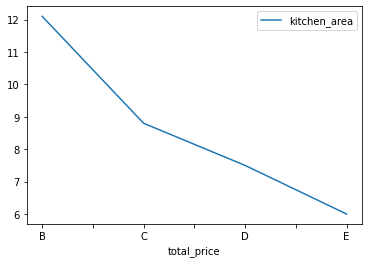

In [104]:
table_kyxny.plot(y='median')

Прослеживается некая зависимость, в категории B, где сумма сделки составляет от 6 до 8 млн., там кухня намного больше. 

Количество комнат и стоимости обьекта.

In [105]:
table_room = data.pivot_table(index= 'total_price',values= 'rooms',aggfunc = ['mean', 'count','median'])
table_room

,mean,count,median
,rooms,rooms,rooms
total_price,,,
B,2.877513,4825,3
C,2.023069,4595,2
D,1.528085,4700,1
E,1.585075,335,1


<AxesSubplot:xlabel='last_price', ylabel='rooms'>

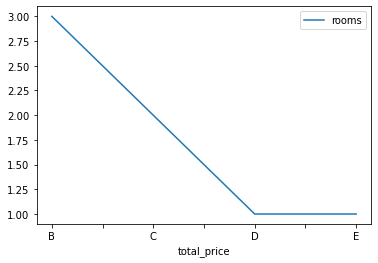

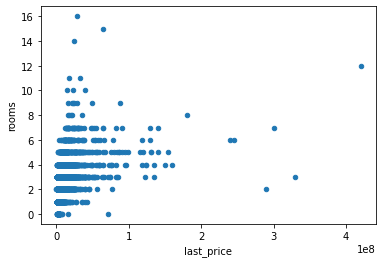

In [106]:
table_room.plot(y='median')
data.plot(x='last_price', y='rooms', kind='scatter')

Прослеживается некая зависимость, в категории B, где сумма сделки составляет от 6 до 8 млн., там комнат больше всего.

Типа этажа, на котором расположена квартира и стоимости обьекта.

In [107]:
table_floor = data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = ['mean', 'count','median'])
table_floor

,mean,count,median
,last_price,last_price,last_price
type_floor,,,
квартира на другом этаж,7.012433e+06,10555,5000000.0
квартира на первом этаже,5.064985e+06,1817,4050000.0
квартира на последнем этаже,7.488269e+06,2083,4500000.0


<AxesSubplot:xlabel='type_floor'>

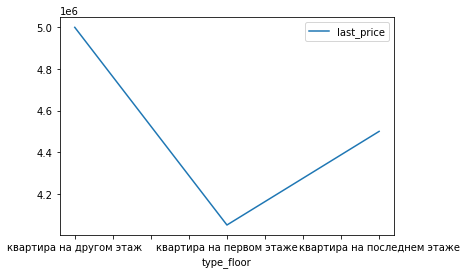

In [108]:
table_floor.plot(y='median')

По графику выводов сделать нельзя, но по сводной таблице увидим то, что квартиры в категории другой этаж стоят дороже. Самые дешевые квартиры на 1 этаже.

In [109]:
table_total_floor = data.pivot_table(index= 'total_price',values= 'floors_total',aggfunc = ['mean', 'count','median'])
print(table_total_floor.corr())
print(table_total_floor)

                            mean        count       median
                    floors_total floors_total floors_total
mean   floors_total     1.000000     0.936274     0.956858
count  floors_total     0.936274     1.000000     0.802726
median floors_total     0.956858     0.802726     1.000000
                    mean        count       median
            floors_total floors_total floors_total
total_price                                       
B              10.863834         4825          9.0
C              11.233515         4595          9.0
D               8.836596         4700          6.5
E               4.582090          335          5.0


<AxesSubplot:xlabel='total_price'>

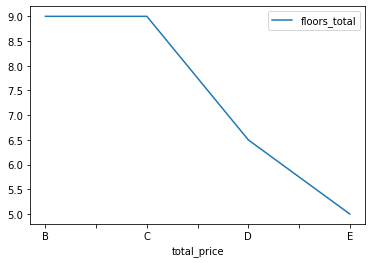

In [110]:
table_total_floor.plot(y='median')

Зависимость стоимость от этажа найдена. Квартиры, которые на 9 этаже стоят дороже, чем квартиры до 9 этажа

In [76]:
table_cityCenters_nearest = data.pivot_table(index= 'total_price',values= 'cityCenters_nearest',aggfunc = ['mean', 'count','median'])
print(table_cityCenters_nearest.corr())
print(table_cityCenters_nearest )

                                          mean               count  \
                           cityCenters_nearest cityCenters_nearest   
mean   cityCenters_nearest            1.000000           -0.574999   
count  cityCenters_nearest           -0.574999            1.000000   
median cityCenters_nearest            0.978192           -0.616199   

                                        median  
                           cityCenters_nearest  
mean   cityCenters_nearest            0.978192  
count  cityCenters_nearest           -0.616199  
median cityCenters_nearest            1.000000  
                           mean               count              median
            cityCenters_nearest cityCenters_nearest cityCenters_nearest
total_price                                                            
B                  10436.559643                4703              9647.0
C                  14997.363989                4121             13749.0
D                  19005.178108             

<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

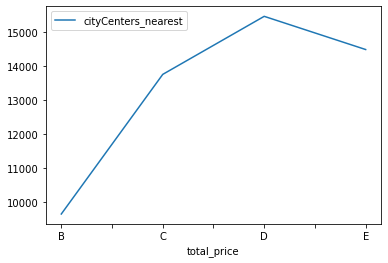

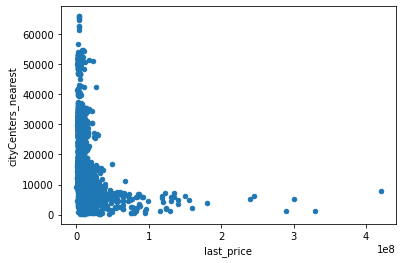

In [111]:
table_cityCenters_nearest.plot(y='median')
data.plot(x='last_price', y='cityCenters_nearest', kind='scatter')

Нельзя точно говорить о зависимости стоимости квартиры от удаленности от центра, так как квартиры в категории Е, стоят дешевле, чем в категории D, но при этом квартиры в категории Е находятся ближе к центру.

In [112]:
table_airports_nearest = data.pivot_table(index= 'total_price',values= 'airports_nearest',aggfunc = ['mean', 'count','median'])
print(table_airports_nearest.corr())
print(table_airports_nearest)

                                    mean            count           median
                        airports_nearest airports_nearest airports_nearest
mean   airports_nearest         1.000000          0.79282         0.970784
count  airports_nearest         0.792820          1.00000         0.893450
median airports_nearest         0.970784          0.89345         1.000000
                        mean            count           median
            airports_nearest airports_nearest airports_nearest
total_price                                                   
B               28140.374013             4687          25984.0
C               29222.526329             4121          28313.0
D               29426.826830             2691          26493.0
E               24920.000000                5          18654.0


<AxesSubplot:xlabel='total_price'>

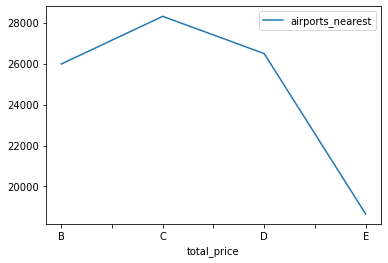

In [113]:
table_airports_nearest.plot(y='median')

Зависимость от удаленности от аэропорта найдена. Чем квартира ближе к аэропорту, тем она дешевле стоит

In [80]:
table_parks_nearest = data.pivot_table(index= 'total_price',values= 'parks_nearest',aggfunc = ['mean', 'count','median'])
print(table_parks_nearest.corr())
print(table_parks_nearest)

                              mean         count        median
                     parks_nearest parks_nearest parks_nearest
mean   parks_nearest      1.000000     -0.789726      0.997660
count  parks_nearest     -0.789726      1.000000     -0.829594
median parks_nearest      0.997660     -0.829594      1.000000
                     mean         count        median
            parks_nearest parks_nearest parks_nearest
total_price                                          
B              479.122496          2596         441.0
C              477.086671          1673         458.0
D              469.739821          1007         460.0
E              805.000000             1         805.0


<AxesSubplot:xlabel='last_price', ylabel='parks_nearest'>

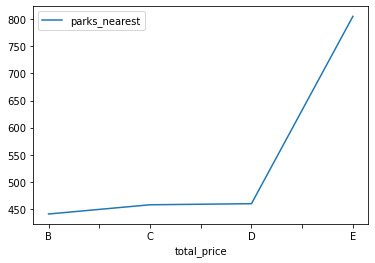

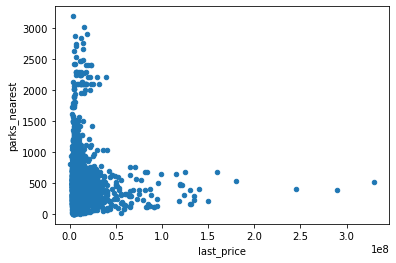

In [114]:
table_parks_nearest.plot(y='median')
data.plot(x='last_price', y='parks_nearest', kind='scatter')

Зависимость найдена. Чем ближе квартира к парку, тем выше стоимость.

3) Изучим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [115]:
data['locality_name'].value_counts().head(10)

санкт-петербург    10081
всеволожск           272
пушкин               234
 шушары              216
 мурино              212
колпино              203
гатчина              148
петергоф             145
 парголово           137
сестрорецк           129
Name: locality_name, dtype: int64

Имеется 10 самых популярных мест по продаже квартир

In [116]:
top=(data.groupby('locality_name')['money_one_m'].agg(['mean', 'count'])).sort_values(by='count').head(10)
print(top['mean'].mean())

30429.558370683586


Найдем максимальную и минимальную  стоимость квадратного метра

In [117]:
price = top.sort_values(by='').head(10)
price

,mean,count
locality_name,,
важины,16666.666667,1
кисельня,20909.090909,1
коркино,22950.819672,1
котлы,24886.877828,1
коммунары,25139.664804,1
шпаньково,27352.941176,1
кингисеппский,32432.432432,1
каськово,37000.000000,1
тарасово,38297.872340,1


Средняя стоимость квадратно метра 34 001, минимальная стоимость 16 666, а максимальная стоимость 58659

4) Выделим среднюю стоимость каждого километра по мере близости к центру квартиры

Создадим таблицу, в которой отображаются только те позиции квартир, которые распологаются в радиусе 7 км до центра.

In [86]:
import warnings

warnings.filterwarnings("ignore")

In [87]:
center_piter=data.query('cityCenters_nearest_km <= 30')
center_piter['cityCenters_nearest_km'] = center_piter['cityCenters_nearest_km'].astype(int)
center_piter

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,money_one_m,deni_nedely,month_piblicated,year_piblicated,type_floor,cityCenters_nearest_km,total_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,3,3,2019,квартира на другом этаж,16,B
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,1,6,2018,квартира на другом этаж,8,B
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,False,...,0,NaN,289.0,88524.590164,6,2,2017,квартира на другом этаж,15,C
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.3,3,False,...,2,553.0,137.0,127525.252525,3,11,2017,квартира на другом этаж,13,C
16,11,6700000.0,82.00,2017-11-23,3,3.05,5,55.6,1,False,...,0,NaN,397.0,81707.317073,3,11,2017,квартира на первом этаже,10,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23554,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.0,12,False,...,0,NaN,23.0,91089.108911,0,4,2019,квартира на другом этаж,14,B
23555,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,...,2,652.0,29.0,100566.572238,2,2,2018,квартира на другом этаж,16,D
23557,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,1,806.0,519.0,129903.978052,3,10,2016,квартира на другом этаж,4,B
23560,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,3,381.0,NaN,72490.845228,1,3,2017,квартира на другом этаж,4,B


In [88]:
km =(center_piter.groupby('cityCenters_nearest_km')['money_one_m'].agg(['mean', 'count']))
km

,mean,count
cityCenters_nearest_km,,
0,169455.667838,57
1,174699.804293,169
2,147486.712047,225
3,126125.864529,342
4,137480.760862,589
5,145561.842440,481
6,155640.857586,296
7,137492.526005,246
8,123368.558778,455


Самые дорогие квартиры распологаются в менее километра от центра, самые дешевые в 3 км от центра.

Вывод:

Была обнаружена зависимость между стоимостью квартиры и ее жилой площадью, площадью кухни и количеством комнат. Минимальная стоимость квадратного метра в одном из 10 самых популярных районов, указанных в объявлениях, составляет 16 037,74 рубля, а максимальная - 56 144,07 рубля. 

Средняя стоимость километра по мере продвижения к центру:

In [89]:
km

,mean,count
cityCenters_nearest_km,,
0,169455.667838,57
1,174699.804293,169
2,147486.712047,225
3,126125.864529,342
4,137480.760862,589
5,145561.842440,481
6,155640.857586,296
7,137492.526005,246
8,123368.558778,455


### Общий вывод

В ходе иследования были реализованны следюущие задачи:
1) Преобрработка данных

2) Изучение параметров 

3) Выделение и подсчет дополнительных параметров

4) Выдвинуты и проанализированы гипотезы


Насколько быстро продаются квартиры в Питере

count    12011.000000
mean       190.324369
std        228.602560
min          1.000000
25%         45.000000
50%        103.000000
75%        247.000000
max       1580.000000
Name: days_exposition, dtype: float64


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

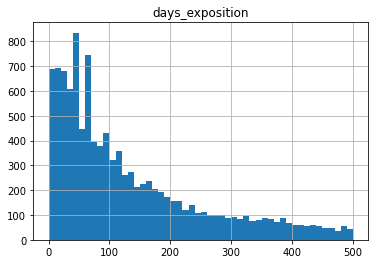

In [90]:
print(prodaji)
data.hist('days_exposition', bins= 50, range = (0,500))

В среднем квартиры продаются 180 дней. Самый быстрые продажи расположены до 1 квантили - до 45 дней, самые долгие - после третьей квантили от 247 дней

2) От чего все таки зависит стоимость квартиры больше всего?

В ходе исследования мы разбили стоимость квартиры на несколько категорий:

от 0  до 1500000.0 категория E

от 1500001.0 до 4000000.0 категория D

от 4000000.0 до 6000000.0 категория C

от 6000000.0 до 763000000.0 категория В

свыше 763000001.0 категория А

И выявили некоторую зависимость параметров, которые влияют на цену

<AxesSubplot:xlabel='total_price'>

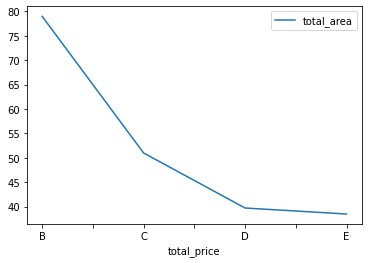

In [118]:
table_total.plot(y='median')

В категории B мы можем наблюдать самое большое среднее количество площади, стоимостб данных квартир от 6 до 7,3 млн рублей. То есть чем квартира дороже, тем общая площадь квартиры больше. Влияние площади на цену подтверждено.

<AxesSubplot:xlabel='total_price'>

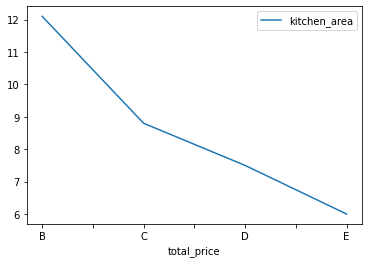

In [119]:
table_kyxny.plot(y='median')

В категории B мы можем наблюдать самое большое среднее количество площади кухни, стоимость данных квартир от 6 до 7,3 млн рублей. То есть чем квартира дороже, тем общая площадь квартиры больше. Влияние площади кухни на цену подтверждено.

<AxesSubplot:xlabel='total_price'>

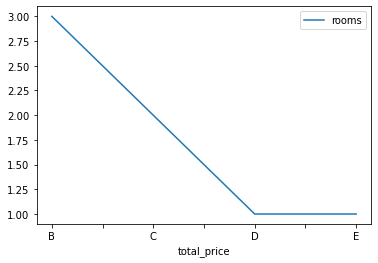

In [120]:
table_room.plot(y='median')

В категории B имеется самое большое среднее количество комнат, а стоимость квартир находится в диапазоне от 6 до 7,3 миллионов рублей. Однако, нельзя однозначно утверждать, что количество комнат сильно влияет на стоимость квартир в данной категории, так как категория D имеет более высокую стоимость, чем категория E, несмотря на то, что среднее количество комнат в категории E выше, чем в категории D. Следовательно, наличие большего количества комнат не является определяющим фактором в ценообразовании на рынке недвижимости в данном случае. Это подтверждается данными на графике.

In [94]:
table_floor

,mean,count
,last_price,last_price
type_floor,,
квартира на другом этаж,7.012433e+06,10555
квартира на первом этаже,5.064985e+06,1817
квартира на последнем этаже,7.488269e+06,2083


На стоимость квартиры влияет этаж, так на последнем этаже квартиры стоят дороже

Теперь посмотрим на среднюю стоимость квадратного метро в популярных местах продаж

In [121]:
price

,mean,count
locality_name,,
важины,16666.666667,1
кисельня,20909.090909,1
коркино,22950.819672,1
котлы,24886.877828,1
коммунары,25139.664804,1
шпаньково,27352.941176,1
кингисеппский,32432.432432,1
каськово,37000.000000,1
тарасово,38297.872340,1


Самые дешевый квадратный метр в "важины", а самый дорогой в "ленинское". Это может быть обусловлено разными факторами, такими как транпортная достпуность, экологичность и другое.

<AxesSubplot:xlabel='total_price'>

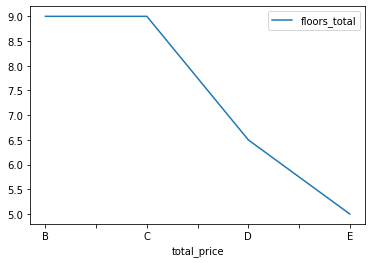

In [122]:
table_total_floor.plot(y='median')

Зависимость стоимость от этажа найдена. Квартиры, которые находятся выше 9 этажа стоят дороже, чем квартиры до 9 этажа

<AxesSubplot:xlabel='total_price'>

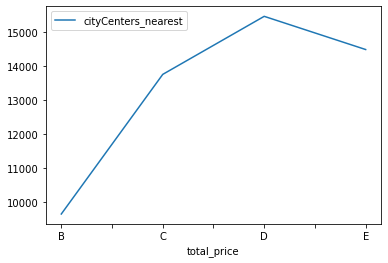

In [123]:
table_cityCenters_nearest.plot(y='median')

Нельзя точно говорить о зависимости стоимости квартиры от удаленности от центра, так как квартиры в категории Е, стоят дешевле, чем в категории D, но при этом квартиры в категории Е находятся ближе к центру.

<AxesSubplot:xlabel='total_price'>

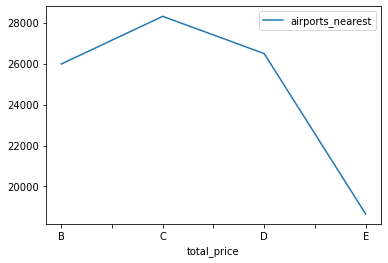

In [124]:
table_airports_nearest.plot(y='median')

Зависимость от удаленности от аэропорта найдена. Чем квартира ближе к аэропорту, тем она дешевле стоит

<AxesSubplot:xlabel='total_price'>

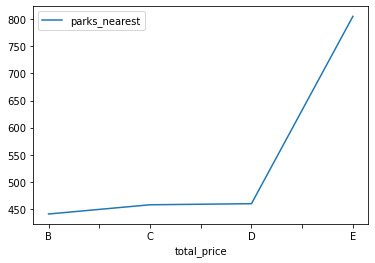

In [125]:
table_parks_nearest.plot(y='median')

зависимость найдена. Чем ближе квартира к парку, тем выше стоимость.

Есть ли зависимость стоимости от удаленности от центра?

In [100]:
km

,mean,count
cityCenters_nearest_km,,
0,169455.667838,57
1,174699.804293,169
2,147486.712047,225
3,126125.864529,342
4,137480.760862,589
5,145561.842440,481
6,155640.857586,296
7,137492.526005,246
8,123368.558778,455


Нельзя определить сильную зависимоть цены от удаленности от центра. Самые дорогие квартиры находятся в удаленности от центра менее 1 км.

При проектировании автоматизированной системы рекомендуется учитывать следующие параметры, которые оказывают большее влияние на стоимость жилья:

- Общая площадь квартиры
- Жилая площадь квартиры
- Площадь кухни
- Этаж расположения квартиры
- Удаленность от аэропорта
- Наличие парков рядом

При оценке стоимости жилья необходимо учитывать их значимость. В особенности стоит обратить внимание на удаленность от аэропорта и наличие парков в близости от квартиры, так как эти параметры оказывают существенное влияние на цену.